In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

In [2]:
data = pd.read_csv('bike-sharing.csv', index_col = 0)
data.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [3]:
data.shape

(17379, 16)

In [4]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [26]:
data.yr.unique()

array([0, 1], dtype=int64)

Ensuring that all rows of the date have the same format

In [6]:
data.dteday

instant
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
5        2011-01-01
            ...    
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
17379    2012-12-31
Name: dteday, Length: 17379, dtype: object

In [7]:
# Format >> %Y-%m-%d
data.dteday.str.len()

instant
1        10
2        10
3        10
4        10
5        10
         ..
17375    10
17376    10
17377    10
17378    10
17379    10
Name: dteday, Length: 17379, dtype: int64

In [8]:
data.dteday.str.len().unique()

array([10], dtype=int64)

In [9]:
data.dteday = pd.to_datetime(data.dteday)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

<AxesSubplot:xlabel='registered', ylabel='Count'>

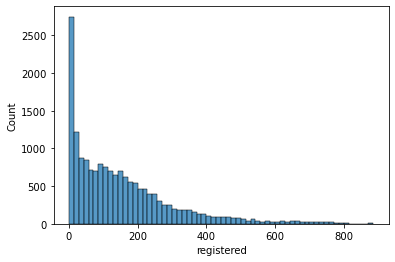

In [11]:
sns.histplot(data.registered)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

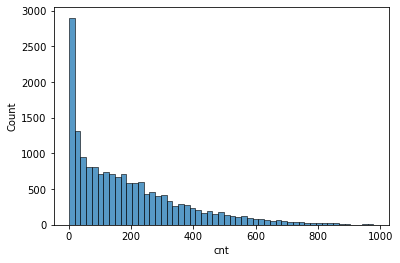

In [12]:
sns.histplot(data.cnt)

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

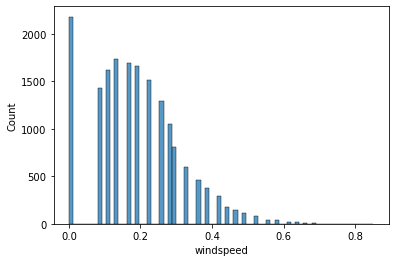

In [13]:
sns.histplot(data.windspeed)

<AxesSubplot:xlabel='weekday', ylabel='Count'>

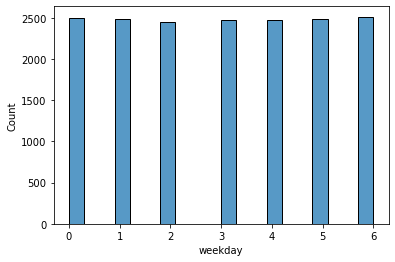

In [14]:
sns.histplot(data.weekday)

<AxesSubplot:xlabel='workingday', ylabel='Count'>

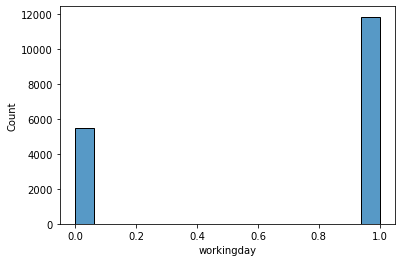

In [15]:
sns.histplot(data.workingday)

In [16]:
# Adding the day of the month
data = data.assign(day_month = data.dteday.dt.day)
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_month
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


<AxesSubplot:xlabel='day_month', ylabel='Count'>

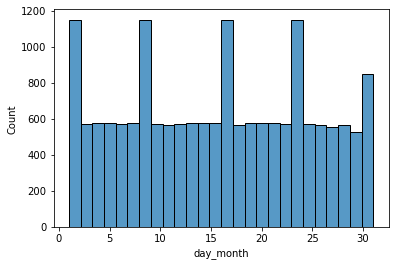

In [17]:
sns.histplot(data.day_month)

In [18]:
train = data.sample(frac = 0.8, random_state = 11)
valid = data.drop(train.index)
print(f'Training Samples: {train.shape[0]}')
print(f'Validation Samples: {valid.shape[0]}')

Training Samples: 13903
Validation Samples: 3476


In [19]:
X_train = train.drop(['dteday', 'cnt'], axis = 1)
y_train = train.iloc[:, -2]

X_train.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day_month
instant,,,,,,,,,,,,,,,
15564,4,1,10,16,0,1,1,1,0.56,0.5303,0.64,0.2985,76,371,15
10098,1,1,3,19,0,4,1,1,0.48,0.4697,0.41,0.3284,11,317,1
10954,2,1,4,13,0,5,1,1,0.44,0.4394,0.33,0.3284,173,238,6


In [20]:
y_train.head()

instant
15564    447
10098    328
10954    411
2433      10
17134    281
Name: cnt, dtype: int64

In [27]:
X_valid = valid.drop(['dteday', 'cnt'], axis = 1)
y_valid = valid.iloc[:, -2]

X_valid.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day_month
instant,,,,,,,,,,,,,,,
8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,1
11,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,1
17,1,0,1,16,0,6,0,2,0.42,0.4242,0.82,0.2985,41,52,1


# Without Scaling

### DecisionTree

In [28]:
model_dt = DecisionTreeRegressor(random_state = 87)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=87)

In [29]:
preds_dt = model_dt.predict(X_valid)
mae = metrics.mean_absolute_error(preds_dt, y_valid)
print(f'DecisionTree MAE: {mae}')

DecisionTree MAE: 2.3811852704257768


### RandomForest

In [30]:
model_rf = RandomForestRegressor(random_state = 88)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=88)

In [31]:
preds_rf = model_rf.predict(X_valid)
mae = metrics.mean_absolute_error(preds_rf, y_valid)
print(f'RandomForest MAE: {mae}')

RandomForest MAE: 0.8875201380897582


### KNeighbors

In [32]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [33]:
preds_knn = model_knn.predict(X_valid)
mae = metrics.mean_absolute_error(preds_knn, y_valid)
print(f'KNeighbors MAE: {mae}')

KNeighbors MAE: 1.7471806674338315


### SVM

In [34]:
model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [36]:
preds_svr = model_svr.predict(X_valid)
mae = metrics.mean_absolute_error(preds_svr, y_valid)
print(f'SupporVector MAE: {mae}')

SupporVector MAE: 4.833008918313542
